## Monochromatic Beam 18.86 keV on Cu sample

In [10]:
import os,shutil
from SimEx.Calculators.GAPDPhotonDiffractor import GAPDPhotonDiffractor
from SimEx.Parameters.GAPDPhotonDiffractorParameters import GAPDPhotonDiffractorParameters
from SimEx.Parameters.DetectorGeometry import DetectorGeometry, DetectorPanel
from SimEx.Parameters.PhotonBeamParameters import PhotonBeamParameters
from SimEx.Utilities.Units import meter, electronvolt, joule, radian

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## Detector setup

In [14]:
detector_panel = DetectorPanel(
            ranges={
                'fast_scan_min': 0,
                'fast_scan_max': 200,
                'slow_scan_min': 0,
                'slow_scan_max': 200
            },
            pixel_size=2200e-6 * meter,
            photon_response=1.0,
            distance_from_interaction_plane=0.25 * meter,
            corners={
                'x': -100,
                'y': -100
            },
        )
detector_geometry = DetectorGeometry(panels=[detector_panel])

## Monochromatic Beam setup

In [15]:
beam = PhotonBeamParameters(
            photon_energy=18.86e3 * electronvolt,
            beam_diameter_fwhm=1.0e-6 * meter,
            pulse_energy=1.0e-3 * joule,
        )

## Diffractor setup

In [26]:
outfile = 'diffr_mono_2.txt'

parameters = GAPDPhotonDiffractorParameters(
            detector_geometry=detector_geometry,
            beam_parameters=beam)

diffractor = GAPDPhotonDiffractor(parameters=parameters,
                                          input_path='single-cu.xyz',
                                          output_path=outfile)

In [27]:
diffractor.backengine()

GAPDPhotonDiffractor backengine command: mpirun -np 72 --map-by node --bind-to none -x OMPI_MCA_mpi_warn_on_fork=0 -x OMPI_MCA_btl_base_warn_component_unused=0 GAPD-SimEx -a -p in.param


127

(201, 201)


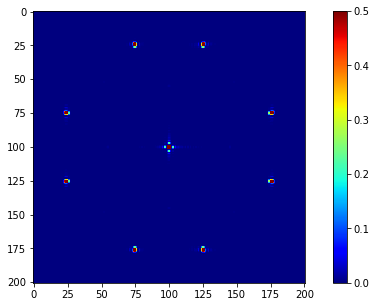

In [29]:
data = np.loadtxt(outfile,ndmin=2)
print (data.shape)
#plt.imshow(data, norm=colors.LogNorm(vmin=data.min(), vmax=data.max()),)
fig = plt.figure(figsize=(10,5))
plt.imshow(data,
           vmax = 0.5,
           cmap=cm.jet)
plt.colorbar()
plt.show()

(201, 201)


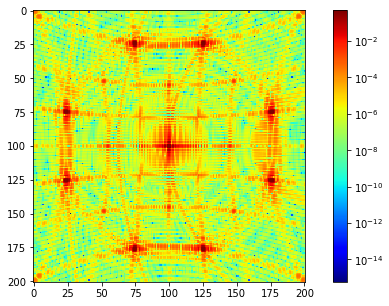

In [30]:
data = np.loadtxt(outfile,ndmin=2)
print (data.shape)
fig = plt.figure(figsize=(10,5))
plt.imshow(data,
           vmax = 0.5,
           cmap=cm.jet,
           norm=colors.LogNorm(vmin=data.min(), vmax=data.max())
          )
plt.colorbar()
plt.show()